# Environment Module - MatchEnv: Clustering Local Particle Environments
The `freud.environment` module analyzes the local environments of particles. The `freud.environment.MatchEnv` class is a useful tool for analyzing particles' local environments and clustering them by their similarity.

In [1]:
import freud
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def thermalize(points, scale):
    cov = scale*np.eye(3)
    cov[2, 2] = 0
    points += np.random.multivariate_normal(mean=np.zeros(3), cov=cov, size=len(points))
    return points

In [3]:
def plot_structure(env, points):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.scatter(points[:, 0], points[:, 1], color='gray')
    plt.gca().set_aspect('equal')    
    plt.title('Initial Structure')
    plt.subplot(122)
    for i in set(env.getClusters()):
        plt.scatter(points[env.getClusters() == i][:, 0],
                    points[env.getClusters() == i][:, 1])
    plt.gca().set_aspect('equal')
    plt.title('Colored by Local Environments')
    plt.show()

In [4]:
def run_sc(therm=0, threshold=0.5):
    box = freud.box.Box.square(L=10)
    unit_cell = [[0.0, 0.0, 0.0],
                 [0.0, 0.5, 0.0],
                 [0.5, 0.0, 0.0]]
    points = np.array([[site[0] + i, site[1] + j, site[2]]
                       for site in unit_cell
                       for i in np.arange(-box.Lx/2, box.Lx/2)
                       for j in np.arange(-box.Ly/2, box.Ly/2)])
    points = thermalize(points, therm)
    points = box.wrap(points)
    env = freud.environment.MatchEnv(box, 1.5, 4)
    env.cluster(points, threshold)
    plot_structure(env, points)

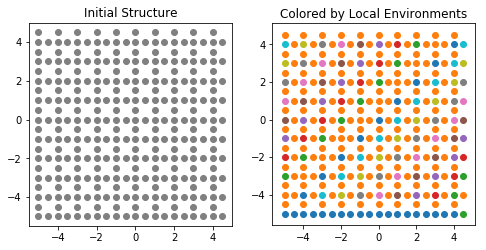

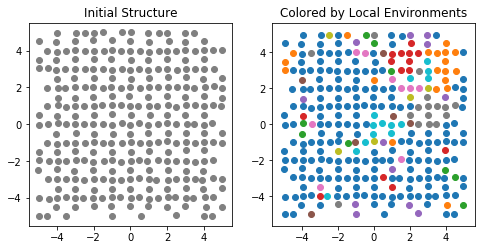

In [5]:
run_sc(therm=0)
run_sc(therm=1e-3)

In [6]:
def run_tri(therm=0, threshold=0.5):
    xy = np.cos(np.pi/3)
    box = freud.box.Box(Lx=10, Ly=10, xy=xy, is2D=True)
    unit_cell = [[0.0, 0.0, 0.0]]
    points = np.array([[site[0] + i + xy * j, site[1] + j, site[2]]
                       for site in unit_cell
                       for i in np.arange(-box.Lx/2, box.Lx/2)
                       for j in np.arange(-box.Ly/2, box.Ly/2)])
    points = thermalize(points, therm)
    points = box.wrap(points)
    drop_index = int(len(points)/2 + 5)
    points = np.concatenate([points[:drop_index], points[drop_index+1:]])
    env = freud.environment.MatchEnv(box, 1.5, 6)
    env.cluster(points, threshold)
    plot_structure(env, points)

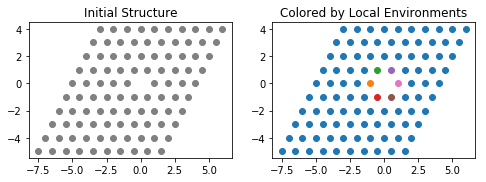

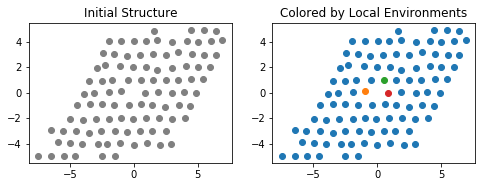

In [7]:
run_tri(therm=0)
run_tri(therm=5e-3)